In [ ]:
# Testing LSH

# This notebook covers the implementation (with Numpy) and testing of a traditional LSH process. Covering shingling, MinHashing, and a straightforward LSH banding process for identifying candidate pairs.

# The first thing we need is data.

In [ ]:
import requests #for importing the data from a url
import pandas as pd #data reading and also visualization towards the end.
import numpy as np
import io #with pandas, reads in the data from the URL.

In [ ]:
# url = "https://raw.githubusercontent.com/brmson/dataset-sts/master/data/sts/sick2014/SICK_train.txt"

# text = requests.get(url).text

# data = pd.read_csv(io.StringIO(text), sep='\t')
# data.head()

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/Book1.csv')
#print(text)

In [ ]:
#sentences = data['sentence_A'].tolist() #convert sentenceA column to a list type
sentences = data['Sentences'].tolist() #convert sentenceA column to a list type
sentences[:3] #each entry in the original df is a list item

['Mathematicians seek and use patterns to formulate new conjectures; they resolve the truth or falsity of such by mathematical proof. When mathematical structures are good models of real phenomena, mathematical reasoning can be used to provide insight or predictions about nature.',
 "Tennis is a racket sport that can be played individually against a single opponent (singles) or between two teams of two players each (doubles). Each player uses a tennis racket that is strung with cord to strike a hollow rubber ball covered with felt over or around a net and into the opponent's court.",
 'Tennis is racquet sport that is played against opponents or teams of players in douhbles. Each player uses a racquet that is strung with a wire to strike a hollow ball covered with fuzz over a net.']

In [ ]:
# We have our data, now to shingle and one-hot encode it.

In [ ]:
def build_shingles(sentence: str, k: int):
    shingles = [] #initialize our shingle list
    for i in range(len(sentence) - k): #goes to the last point that allows for a "complete" shingle (length k)
        shingles.append(sentence[i:i+k])
    return set(shingles)

def build_vocab(shingle_sets: list):
    # convert list of shingle sets into single set
    full_set = {item for set_ in shingle_sets for item in set_}
      #underscore after "set" just tells python that we're using what would o/w be a class name as something else (iterator in this case)
    vocab = {}
    print(full_set)
    for i, shingle in enumerate(list(full_set)):
        vocab[shingle] = i #builds the dictionary with keys = shingles, values = index
    return vocab

# one_hot gets used in a loop
# each time it puts a 1 in the index == value in the vocab dictionary for that shingle
def one_hot(shingles: set, vocab: dict):
    vec = np.zeros(len(vocab))
    for shingle in shingles:
        idx = vocab[shingle]
        vec[idx] = 1
    return vec

In [ ]:
k = 6  # shingle size

from tqdm import tqdm #b/c I like progress bars.

# build shingles
shingles = []
for sentence in tqdm(sentences):
    shingles.append(build_shingles(sentence, k))

# build vocab
vocab = build_vocab(shingles)

# one-hot encode our shingles
shingles_1hot = []
for shingle_set in shingles:
    shingles_1hot.append(one_hot(shingle_set, vocab))
# stack into single numpy array
shingles_1hot = np.stack(shingles_1hot) #converts our list to an array
shingles_1hot.shape

100%|██████████| 15/15 [00:00<00:00, 5009.52it/s]

{'ssiona', 'mitles', 'tor? A', 'ractic', 'ncorpo', 'dventu', 'king a', 'roo, a', ' meani', 'w rubb', 'cludin', 'eld is', 'ystery', 'nger? ', 'ment a', 'all is', 'orithm', 'l syst', ' membe', 'it. Th', 'rial s', 'ainst ', 'ubber ', 'and\xa0co', 's Appl', 'ividua', 'zz ove', 'pular ', 'e most', 'tion a', 'ive th', 'a net ', 'gle op', 'enomen', 'd Rona', 'ak, an', 'stems ', ' the m', 'inform', 'l norm', '? A ma', 'al sys', 's from', ' mathe', 'rder C', 'rtaint', 'rd is ', 'It was', 'm is u', 'to com', 'am, re', 'ia are', 'as App', 'ut nat', 'f foot', 're\xa0and', ' insig', 'ion\xa0it', ' of my', 'e fami', 'n acti', 'nd Woz', 'are un', 'ession', ' formu', ' of fo', 'f adve', 'sonal ', ' to va', 'xtract', ' trigg', 'As a d', 'codili', 'foot")', 'bles. ', 'ers ea', 'on\xa0and', 'be the', 'insigh', 'about ', 'grew q', 's usua', 'o deal', 'ound a', 'ls wit', 'nst op', 'line, ', 'tilopi', 've Woz', 'shoot ', 'machin', 'n ore ', 'otball', 'cropod', 'ge of ', ' A col', 's of e', 'ere is', 'he ext

(15, 2498)

In [ ]:
vocab = build_vocab(shingles)

len(shingles)

{'ssiona', 'mitles', 'tor? A', 'ractic', 'ncorpo', 'dventu', 'king a', 'roo, a', ' meani', 'w rubb', 'cludin', 'eld is', 'ystery', 'nger? ', 'ment a', 'all is', 'orithm', 'l syst', ' membe', 'it. Th', 'rial s', 'ainst ', 'ubber ', 'and\xa0co', 's Appl', 'ividua', 'zz ove', 'pular ', 'e most', 'tion a', 'ive th', 'a net ', 'gle op', 'enomen', 'd Rona', 'ak, an', 'stems ', ' the m', 'inform', 'l norm', '? A ma', 'al sys', 's from', ' mathe', 'rder C', 'rtaint', 'rd is ', 'It was', 'm is u', 'to com', 'am, re', 'ia are', 'as App', 'ut nat', 'f foot', 're\xa0and', ' insig', 'ion\xa0it', ' of my', 'e fami', 'n acti', 'nd Woz', 'are un', 'ession', ' formu', ' of fo', 'f adve', 'sonal ', ' to va', 'xtract', ' trigg', 'As a d', 'codili', 'foot")', 'bles. ', 'ers ea', 'on\xa0and', 'be the', 'insigh', 'about ', 'grew q', 's usua', 'o deal', 'ound a', 'ls wit', 'nst op', 'line, ', 'tilopi', 've Woz', 'shoot ', 'machin', 'n ore ', 'otball', 'cropod', 'ge of ', ' A col', 's of e', 'ere is', 'he ext

15

In [ ]:
print(shingles_1hot.shape)
print(shingles_1hot[:5])

(15, 2498)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [ ]:
sum(shingles_1hot[0])  # confirm we have 1s

249.0

In [ ]:
# MinHash
# Now we move onto minhashing, first we need to create functions for building a range of minhash vectors, and another to process our sparse vectors through this minhash array - to produce our signatures.

In [ ]:
def minhash_arr(vocab: dict, resolution: int):
    length = len(vocab.keys())
    arr = np.zeros((resolution, length))
    for i in range(resolution):
        permutation = np.random.permutation(len(vocab)) + 1
        arr[i, :] = permutation.copy()
    return arr.astype(int)

def get_signature(minhash, vector):
    # get index locations of every 1 value in vector
    idx = np.nonzero(vector)[0].tolist()
    # use index locations to pull only +ve positions in minhash
    shingles = minhash[:, idx]
    # find minimum value in each hash vector
    signature = np.min(shingles, axis=1)
    return signature

In [ ]:
arr = minhash_arr(vocab, 40)

signatures = []

for vector in shingles_1hot:
    signatures.append(get_signature(arr, vector))

# merge signatures into single array
signatures = np.stack(signatures)
signatures.shape

(15, 40)

In [ ]:
signatures[0]

array([ 3,  2,  5,  4,  2, 11, 43,  5, 15,  6,  1,  5,  2,  4,  1, 12, 30,
       10,  9,  2,  5,  9, 16,  2,  3,  6,  8,  4, 26,  3, 13, 26,  3,  3,
        8, 10,  9,  6,  2, 11])

In [ ]:
# LSH
# Finally, we move onto the LSH process. We will use a class here:

In [ ]:
from itertools import combinations

class LSH:
    buckets = []
    counter = 0
    def __init__(self, b):
        self.b = b
        for i in range(b):
            self.buckets.append({})

    def make_subvecs(self, signature): #makes a (b, l/b) shape array of our subvectors, which is just an array of the original signature
        #that is, row 1 = values 1:5, row 2 = values 6:10, ... row 20 = values 96:100 on a 100-value signature.
        l = len(signature)
        assert l % self.b == 0
        r = int(l / self.b)
        # break signature into subvectors
        subvecs = []
        for i in range(0, l, r):
            subvecs.append(signature[i:i+r])
        return np.stack(subvecs)
    
    def add_hash(self, signature): #Here we're checking each subvector to see if it's in the 'dictionary' of keys and values that we're building.
        #If it's in there, we increment the counter for that subvector.
        #If it's not in there, we make a new entry with that subvector.
        subvecs = self.make_subvecs(signature).astype(str)
        for i, subvec in enumerate(subvecs):
            subvec = ','.join(subvec)
            if subvec not in self.buckets[i].keys():
                self.buckets[i][subvec] = []
            self.buckets[i][subvec].append(self.counter)
        self.counter += 1

    def check_candidates(self):
        candidates = []
        for bucket_band in self.buckets:
            keys = bucket_band.keys()
            for bucket in keys:
                hits = bucket_band[bucket]
                if len(hits) > 1:
                    candidates.extend(combinations(hits, 2))
        return set(candidates)

In [ ]:
b = 20 #number of buckets

lsh = LSH(b)

for signature in signatures:
    lsh.add_hash(signature)

In [ ]:
lsh.buckets
# Now we've filled our hash buckets all we need to do is loop through each and where we have multiple entries in a single bucket, mark these as our candidate pairs.
# If you look through the keys, you'll see some have more than one value.
# These are the candidate pairs who share some 

In [ ]:
candidate_pairs = lsh.check_candidates()
len(candidate_pairs)

#num_buckets = [1,2,5,10,20,25,50,100]
#cand_pairs = [13468, 13468, 13468, 13468, 25385, 31436, 153464, 1289942]

5

In [ ]:
list(candidate_pairs)[:6] #candidate_pairs was a set, so we observe as a list

[(1, 2), (10, 11), (4, 6), (0, 13), (7, 9)]

In [ ]:
# We now have all of our candidate pairs!
# Optimizing the Bands

# Now let's visualize the actual cosine similarity of our signature vectors against whether we identified the signatures as candidate pairs or not.

# (we will also calculate Jaccard but it's less useful here, try both!)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def jaccard(a: set, b: set):
    return len(a.intersection(b)) / len(a.union(b))

In [ ]:
pairs = pd.DataFrame({
    'x': [],
    'y': [],
    'jaccard': [],
    'cosine': [],
    'candidate': []
})

data_len = shingles_1hot.shape[0]
chosen = set()
# take random sample of pairs
sample_size = 50000
for _ in tqdm(range(sample_size)):
    x, y = np.random.choice(data_len, 2) #x is a random index, and y is a 0 or 1.
    #if our (index,one_hot) tuples matches, we move forward.
    if x == y or (x, y) in chosen: continue
    chosen.add((x, y))
    vector_x = signatures[x]
    vector_y = signatures[y]
    candidate = 1 if (x, y) in candidate_pairs else 0
    cosine = cosine_similarity([vector_x], [vector_y])[0][0] #convert the np.arrays to lists (vectors) for cosine comparison
    pairs = pairs.append({
            'x': x,
            'y': y,
            'jaccard': jaccard(set(vector_x), set(vector_y)),
            'cosine': cosine,
            'candidate': candidate
        }, ignore_index=True)

# add a normalized cosine column for better alignment
cos_min = pairs['cosine'].min()
cos_max = pairs['cosine'].max()
pairs['cosine_norm'] = (pairs['cosine'] - cos_min) / (cos_max - cos_min)

100%|██████████| 50000/50000 [00:06<00:00, 8133.32it/s]


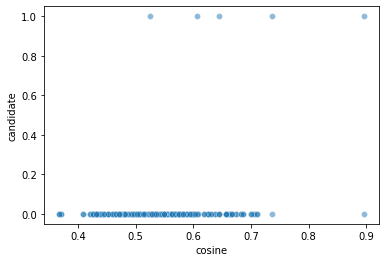

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#sns.scatterplot(data=pairs, x='cosine', y='candidate', alpha=0.5)
plot1 = sns.scatterplot(data=pairs, x='cosine', y='candidate', alpha=0.5)
plt.show(plot1)

In [ ]:
# Now, this is an interesting way to visualize our distribution, but we have reason. 
# We can actually tune our LSH function using b, and we have a formalized function that tells us the probability of identifying a pair as candidate pairs given their similarity. 
# We calculate this as so:

def probability(s, r, b):
    # s: similarity
    # r: rows (per band)
    # b: number of bands
    return 1 - (1 - s**r)**b

def normalize(x, x_min, x_max):
    return (x - x_min) / (x_max - x_min)

In [ ]:
# Let's visualize that for our current parameters, alongside our scatter plot.

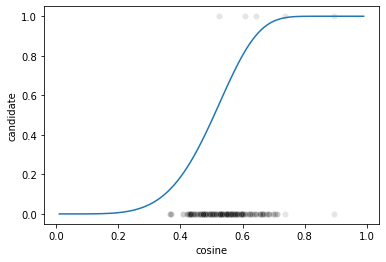

In [ ]:
b = 20
r = int(100 / b)
s_scores = np.arange(0.01, 1, 0.01)
P_scores = [probability(s, r, b) for s in s_scores]

sns.lineplot(x=s_scores, y=P_scores)
sns.scatterplot(data=pairs, x='cosine', y='candidate', alpha=0.1, color='k')

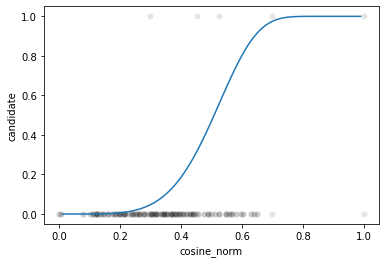

In [ ]:
b = 20
r = int(100 / b)
s_scores = np.arange(0.01, 1, 0.01)
P_scores = [probability(s, r, b) for s in s_scores]

sns.lineplot(x=s_scores, y=P_scores)
sns.scatterplot(data=pairs, x='cosine_norm', y='candidate', alpha=0.1, color='k')

In [ ]:
from numpy.ma.extras import average
def calculate(df):
  four = ['jaccard', 'cosine', 'candidate', 'cosine_norm']
  avgs, maxes, mins = [], [], []
  for label in four:
    avgs.append(average(df[label]))
    maxes.append(max(df[label]))
    mins.append((min(df[label])))
  return(avgs, maxes, mins)


In [ ]:
only_pairs = pairs[pairs['candidate']==1]
only_fails = pairs[pairs['candidate']==0]
pairs_values = calculate(only_pairs)
fails_values = calculate(only_fails)
all_values = calculate(pairs)
print(pairs_values)
print(fails_values)
print(all_values)

([0.4744793709758646, 0.6813809681196255, 1.0, 0.5947921735786784], [0.6521739130434783, 0.8953775328064334, 1.0, 1.0], [0.32432432432432434, 0.5242093854321039, 1.0, 0.29718386622468823])
([0.46366964695177665, 0.5419008792222832, 0.0, 0.33068315045551955], [0.7391304347826086, 0.8953775328064334, 0.0, 1.0], [0.2571428571428571, 0.3672619567161002, 0.0, 0.0])
([0.4639270213333026, 0.545221833719839, 0.023809523809523808, 0.3369714605298804], [0.7391304347826086, 0.8953775328064334, 1.0, 1.0], [0.2571428571428571, 0.3672619567161002, 0.0, 0.0])


In [ ]:
#Finding number of pairs based on min similarity values of the exisiting pairs
print(sum(pairs[pairs['jaccard']>0.6521739130434783]['candidate']))
# pairs[pairs['jaccard']>0.4744793709758646] #avg
pairs[pairs['jaccard']>0.6521739130434783] #max
# pairs[pairs['jaccard']>0.32432432432432434] #min
# pairs[pairs['cosine']>0.6813809681196255] #avg
# pairs[pairs['cosine']>0.8953775328064334] #max
# pairs[pairs['cosine']>0.5242093854321039] #min

0.0


,x,y,jaccard,cosine,candidate,cosine_norm
5,12.0,5.0,0.680000,0.674513,0.0,0.581787
59,5.0,12.0,0.680000,0.674513,0.0,0.581787
62,1.0,7.0,0.666667,0.573929,0.0,0.391330
66,4.0,12.0,0.739130,0.589686,0.0,0.421165
123,5.0,4.0,0.680000,0.581162,0.0,0.405026
129,12.0,4.0,0.739130,0.589686,0.0,0.421165
146,7.0,12.0,0.695652,0.699408,0.0,0.628927
164,12.0,7.0,0.695652,0.699408,0.0,0.628927
184,7.0,1.0,0.666667,0.573929,0.0,0.391330
191,4.0,5.0,0.680000,0.581162,0.0,0.405026


In [ ]:
pairs[pairs['cosine']>0.6813809681196255]

,x,y,jaccard,cosine,candidate,cosine_norm
0,11.0,10.0,0.324324,0.736539,0.0,0.699236
2,11.0,7.0,0.314286,0.685628,0.0,0.602834
10,10.0,11.0,0.324324,0.736539,1.0,0.699236
52,9.0,8.0,0.419355,0.704838,0.0,0.639208
53,0.0,13.0,0.652174,0.895378,1.0,1.000000
74,8.0,10.0,0.371429,0.710209,0.0,0.649379
75,8.0,9.0,0.419355,0.704838,0.0,0.639208
84,13.0,0.0,0.652174,0.895378,0.0,1.000000
110,3.0,1.0,0.518519,0.682432,0.0,0.596782
112,10.0,8.0,0.371429,0.710209,0.0,0.649379


In [ ]:
pairs[pairs['x']==1.0]
# Seeing how many false positives we'd get if we used the lowest true pair (this one was missed)
pairs[pairs['jaccard']>0.379310]
pairs[pairs['cosine']>0.605875]
pairs[pairs['cosine_norm']>0.518626]

,x,y,jaccard,cosine,candidate,cosine_norm
1,1.0,0.0,0.480000,0.421327,0.0,0.260297
11,1.0,5.0,0.500000,0.474466,0.0,0.334680
12,1.0,11.0,0.281250,0.592727,0.0,0.500222
16,1.0,12.0,0.416667,0.280834,0.0,0.063636
29,1.0,10.0,0.500000,0.639252,0.0,0.565347
72,1.0,2.0,0.379310,0.605875,0.0,0.518626
73,1.0,4.0,0.590909,0.440120,0.0,0.286604
86,1.0,3.0,0.370370,0.586625,0.0,0.491680
98,1.0,7.0,0.481481,0.652094,0.0,0.583324
150,1.0,6.0,0.440000,0.553255,0.0,0.444969


In [ ]:
# From here we can attempt to modify the similarity threshold t - which is the cut-off point on our similarity axes as to where we would like a given cosine similarity to rate as a candidate pair or not.

# Let's try a few different band values with our probability formula to see where this balance may be.

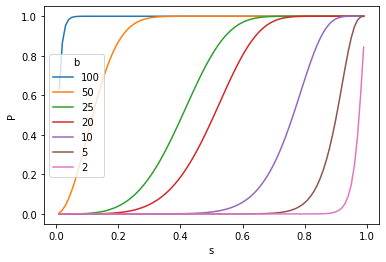

In [ ]:
probs = pd.DataFrame({
    'P': [],
    's': [],
    'b': []
}) #initialize the df

for b in [100, 50, 25, 20, 10, 5, 2]: #test diff band sizes
    r = int(100 / b)
    s_scores = np.arange(0.01, 1, 0.01) #calculate at small increments to create the smooth curve
    P_scores = [probability(s, r, b) for s in s_scores]
    probs = probs.append(pd.DataFrame({
        'P': P_scores,
        's': s_scores,
        'b': [str(b)]*len(s_scores)
    }), ignore_index=True)

sns.lineplot(data=probs, x='s', y='P', hue='b')
#What we get is a plot showing sigmoid-lik curves.
#The t (threshold) of similarity to be classified as a 1 here shifts as our b value shifts.
#So for b=20, we're seeing t of s=~.4 to be classified as a match.
#For b=10, we see t of s=~.8 or so.
#What counts as "too high" is subjective and depends on your goal/data set.
#For plagiarism detection, I'd argue that false positives aren't a huge deal because
  #they're going to be reviewed later by a human.

In [ ]:
# So a b value of 20 gave us a threshold value t slightly too high (depending on our definition of 'similar'), so maybe we can use b == 25 to get a better distribution of our candidate pairs.

In [ ]:
# b = 25

# lsh = LSH(b)

# for signature in signatures:
#     lsh.add_hash(signature)

# candidate_pairs = lsh.check_candidates()
# len(candidate_pairs)

#pretty sure this was me screwing around

In [ ]:
pairs = pd.DataFrame({
    'x': [],
    'y': [],
    'jaccard': [],
    'cosine': [],
    'candidate': []
})

data_len = shingles_1hot.shape[0]
chosen = set()
# take random sample of pairs
sample_size = 50_000
for _ in tqdm(range(sample_size)):
    x, y = np.random.choice(data_len, 2)
    if x == y or (x, y) in chosen: continue
    chosen.add((x, y))
    vector_x = signatures[x]
    vector_y = signatures[y]
    candidate = 1 if (x, y) in candidate_pairs else 0
    cosine = cosine_similarity([vector_x], [vector_y])[0][0]
    pairs = pairs.append({
            'x': x,
            'y': y,
            'jaccard': jaccard(set(vector_x), set(vector_y)),
            'cosine': cosine,
            'candidate': candidate
        }, ignore_index=True)

# add a normalized cosine column for better alignment
cos_min = pairs['cosine'].min()
cos_max = pairs['cosine'].max()
pairs['cosine_norm'] = (pairs['cosine'] - cos_min) / (cos_max - cos_min)

100%|██████████| 50000/50000 [00:02<00:00, 21305.41it/s]


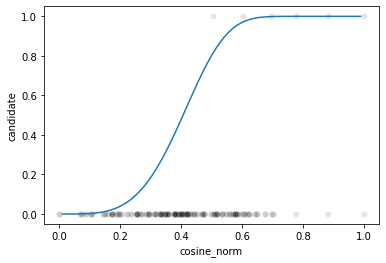

In [ ]:
r = int(100 / b)
s_scores = np.arange(0.01, 1, 0.01)
P_scores = [probability(s, r, b) for s in s_scores]

sns.lineplot(x=s_scores, y=P_scores)
sns.scatterplot(data=pairs, x='cosine_norm', y='candidate', alpha=0.1, color='k')

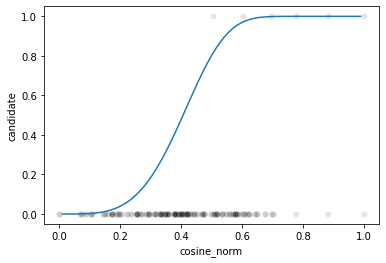

In [ ]:
r = int(100 / b)
s_scores = np.arange(0.01, 1, 0.01)
P_scores = [probability(s, r, b) for s in s_scores]

sns.lineplot(x=s_scores, y=P_scores)
sns.scatterplot(data=pairs, x='cosine_norm', y='candidate', alpha=0.1, color='k')

In [ ]:
# Shifting from b == 20 to b == 25 has reduced the number of non-candidates around 0.7 - 0.8, and we can see that the number of candidate pairs in total has increased significantly too, from 7468 to 19436.

# Now, in our own use-cases, the preferred similarity threshold will of-course change.

# It's also worth noting that different similarity metrics will produce different charts:


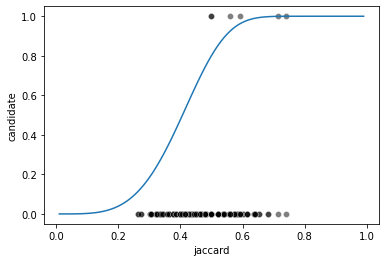

In [ ]:
r = int(100 / b)
s_scores = np.arange(0.01, 1, 0.01)
P_scores = [probability(s, r, b) for s in s_scores]

sns.lineplot(x=s_scores, y=P_scores)
sns.scatterplot(data=pairs, x='jaccard', y='candidate', alpha=0.5, color='k')

In [ ]:
#BELOW THIS LINE, I'M TRYING TO MAKE THE DATA.FRAME OF COSINE, COSINE_NORM, AND JACCARD SIMILARITY FOR OUR DATA TO FIND A THRESHOLD.

In [ ]:
no_matches = pd.read_csv('gdrive/My Drive/Colab Notebooks/Book2.csv')
sentences = no_matches['Sentences'].tolist()
no_matches

,Person,Sentences,Plagiarised
0,A,Mathematicians seek and use patterns to formul...,1
1,C,Tennis is racquet sport that is played against...,1
2,D,Football is a family of team sports that invol...,0
3,E,Terraria is a land of adventure! A land of mys...,1
4,F,Mining is the extraction of valuable minerals ...,0
5,H,Computer science is the study of algorithmic p...,1
6,J,An actuary is a business professional who deal...,0
7,L,"Apple was founded by Steve Jobs, Steve Wozniak...",1
8,N,Crocodiles (family Crocodylidae) or true croco...,0
9,P,The kangaroo is a marsupial from the family Ma...,0


In [ ]:
k = 6  # shingle size

# build shingles
shingles = []
for sentence in tqdm(sentences):
    shingles.append(build_shingles(sentence, k))

# build vocab
vocab = build_vocab(shingles)

# one-hot encode our shingles
shingles_1hot = []
for shingle_set in shingles:
    shingles_1hot.append(one_hot(shingle_set, vocab))
# stack into single numpy array
shingles_1hot = np.stack(shingles_1hot) #converts our list to an array
shingles_1hot.shape

100%|██████████| 10/10 [00:00<00:00, 6261.09it/s]

{'ion\xa0an', 'ven mo', 'nerali', 'res ar', ', mean', ' used ', 'is pla', ' maste', 'uzz ov', 'or tea', 'iness ', 'used t', ', kick', 'ours t', 'ians s', 'al fro', 'opular', 'roo, e', 'mathem', 'e, def', 'rmally', ' A lan', 'llow b', 'ered w', 'es (fa', 'it. Th', 'le was', 'to pro', 'the te', 'ing ca', ' risk ', 'r fing', 'heoret', 'ge foo', 'h play', 'nd Woz', 'ateria', 'eams o', 'r ever', 'uarial', 'ine ka', 'l stud', 'es are', 'quickl', 'ion\xa0it', 'ger? A', 'rs, in', ' is us', ' lode,', 'olve t', ' II, g', 'udies ', ' manag', 'they r', 'easoni', 'hing f', 'layers', 'Your o', 'Each p', 're loo', 'ied, t', 'dae (m', ' or te', 'ropods', 'idae) ', 'tions ', 'In com', 'cking ', 'rraria', 'ght or', 'a disc', 'ost po', 'as inc', ' commo', 'bout n', 'ector?', 'issues', 'trigge', 'y reso', 'n itch', 'tiles ', 'in 197', 'r buil', 'omputa', 'otball', 'cs in ', ' means', ' reef,', 'ke a h', ' this ', 'alia. ', ' and u', 'gement', 'mic in', 's in d', 'der? A', 'ucture', 'n 1976', 'ilder?', ' h

(10, 2130)

In [ ]:
vocab = build_vocab(shingles)
len(shingles)

{'ion\xa0an', 'ven mo', 'nerali', 'res ar', ', mean', ' used ', 'is pla', ' maste', 'uzz ov', 'or tea', 'iness ', 'used t', ', kick', 'ours t', 'ians s', 'al fro', 'opular', 'roo, e', 'mathem', 'e, def', 'rmally', ' A lan', 'llow b', 'ered w', 'es (fa', 'it. Th', 'le was', 'to pro', 'the te', 'ing ca', ' risk ', 'r fing', 'heoret', 'ge foo', 'h play', 'nd Woz', 'ateria', 'eams o', 'r ever', 'uarial', 'ine ka', 'l stud', 'es are', 'quickl', 'ion\xa0it', 'ger? A', 'rs, in', ' is us', ' lode,', 'olve t', ' II, g', 'udies ', ' manag', 'they r', 'easoni', 'hing f', 'layers', 'Your o', 'Each p', 're loo', 'ied, t', 'dae (m', ' or te', 'ropods', 'idae) ', 'tions ', 'In com', 'cking ', 'rraria', 'ght or', 'a disc', 'ost po', 'as inc', ' commo', 'bout n', 'ector?', 'issues', 'trigge', 'y reso', 'n itch', 'tiles ', 'in 197', 'r buil', 'omputa', 'otball', 'cs in ', ' means', ' reef,', 'ke a h', ' this ', 'alia. ', ' and u', 'gement', 'mic in', 's in d', 'der? A', 'ucture', 'n 1976', 'ilder?', ' h

10

In [ ]:
arr = minhash_arr(vocab, 40)

signatures = []

for vector in shingles_1hot:
    signatures.append(get_signature(arr, vector))

# merge signatures into single array
signatures = np.stack(signatures)
signatures.shape

(10, 40)

In [ ]:
b = 20 #number of buckets

lsh = LSH(b)

for signature in signatures:
    lsh.add_hash(signature)

In [ ]:
candidate_pairs = lsh.check_candidates()
print(len(candidate_pairs))
list(candidate_pairs)[:5] #candidate_pairs was a set, so we observe as a list

23


[(7, 3), (4, 7), (10, 11), (6, 6), (7, 7)]